# **Class 4: Deep Learning Introduction**

In [4]:
from IPython.display import Image, display
project_path = '/Users/tmsantos/Documents/CapstoneProject/CapstoneProject/'

# Part 1: Regression Problem with Single Layer Perceptron

## Delta Rule: Derivative of Mean Squared Error (MSE) and Weight Update

### Mean Squared Error (MSE) Loss Function

The Mean Squared Error (MSE) is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$ is the number of data points.
- $ y_i $ is the actual target value.
- $ \hat{y}_i $ is the predicted value of the model.

The objective is to minimize the MSE, so we need to find the gradient of the MSE with respect to the weight $ w $.

### Derivative of MSE with Respect to Weight $ w $

The predicted value $ \hat{y}_i $ is given by a linear equation:

$$
\hat{y}_i = w \cdot x_i + b
$$

Substitute $ \hat{y}_i $ into the MSE formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2
$$

Now, let's differentiate the MSE with respect to $ w $:


$$
\frac{\partial \text{MSE}}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial}{\partial w} \left[ (y_i - (w \cdot x_i + b))^2 \right]
$$

Using the chain rule, the derivative becomes:

$$
\frac{\partial \text{MSE}}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - \hat{y}_i) \cdot (-x_i)
$$

Simplifying:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


### Derivative of MSE with Respect to Bias $ b $

The predicted value $ \hat{y}_i $ is given by a linear equation:

$$
\hat{y}_i = w \cdot x_i + b
$$

Substitute $ \hat{y}_i $ into the MSE formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2
$$

Now, let's differentiate the MSE with respect to $ b $:

$$
\frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial}{\partial b} \left[ (y_i - (w \cdot x_i + b))^2 \right]
$$

Using the chain rule, the derivative becomes:

$$
\frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - \hat{y}_i) \cdot (-1)
$$

Simplifying:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

### Gradient Descent Update Rule for Weight $w$

In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{MSE}}{\partial w}
$$

Substitute the derivative of MSE with respect to \( w \):

$$
w = w - \eta \cdot \left(-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
$$

This simplifies to:

$$
w = w + \eta \cdot \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


For the **Delta Rule**, we typically consider updating weights for **each individual training example** rather than averaging over the entire dataset. This means we can drop the $ \frac{2}{n} $ factor and use only the term $ (y_i - \hat{y}_i) \cdot x_i $ to update the weight incrementally:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

### Gradient Descent Update Rule for Bias $b$

In gradient descent, the bias $ b $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
b = b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Substitute the derivative of MSE with respect to $ b $:

$$
b = b - \eta \cdot \left(-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
$$

This simplifies to:

$$
b = b + \eta \cdot \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

For the **Delta Rule**, we typically consider updating bias for **each individual training example** rather than averaging over the entire dataset. This means we can drop the $ \frac{2}{n} $ factor and use only the term $ (y_i - \hat{y}_i) $ to update the bias incrementally:

$$
b = b + \eta \cdot (y_i - \hat{y}_i)
$$

### Why Drop the $ \frac{2}{n} $ Factor?

In the Delta Rule, the weight update is performed **per training example** instead of for the entire batch. The $ \frac{2}{n} $ factor is only necessary when considering the average over the entire dataset (batch gradient descent). For incremental updates (also known as **stochastic gradient descent**), the weight update is directly proportional to the error without needing to average over all samples.

### Final Weight Update Rule

The weight update rule for each individual training example becomes:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

This is the Delta Rule used in the regression example, where:

- $ y_i - \hat{y}_i $ is the error.
- $ \eta $ is the learning rate.
- $ x_i $ is the input feature.

### Final Bias Update Rule

The bias update rule for each individual training example becomes:

$$
b = b + \eta \cdot (y_i - \hat{y}_i)
$$

This is the Delta Rule used in the regression example, where:

- $ y_i - \hat{y}_i $ is the error.
- $  \eta $  is the learning rate.


### Solving Regression Problem using Delta Rule (Stocastic Gradient Descent)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We will generate training data with one feature.

In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2
input_size = 1

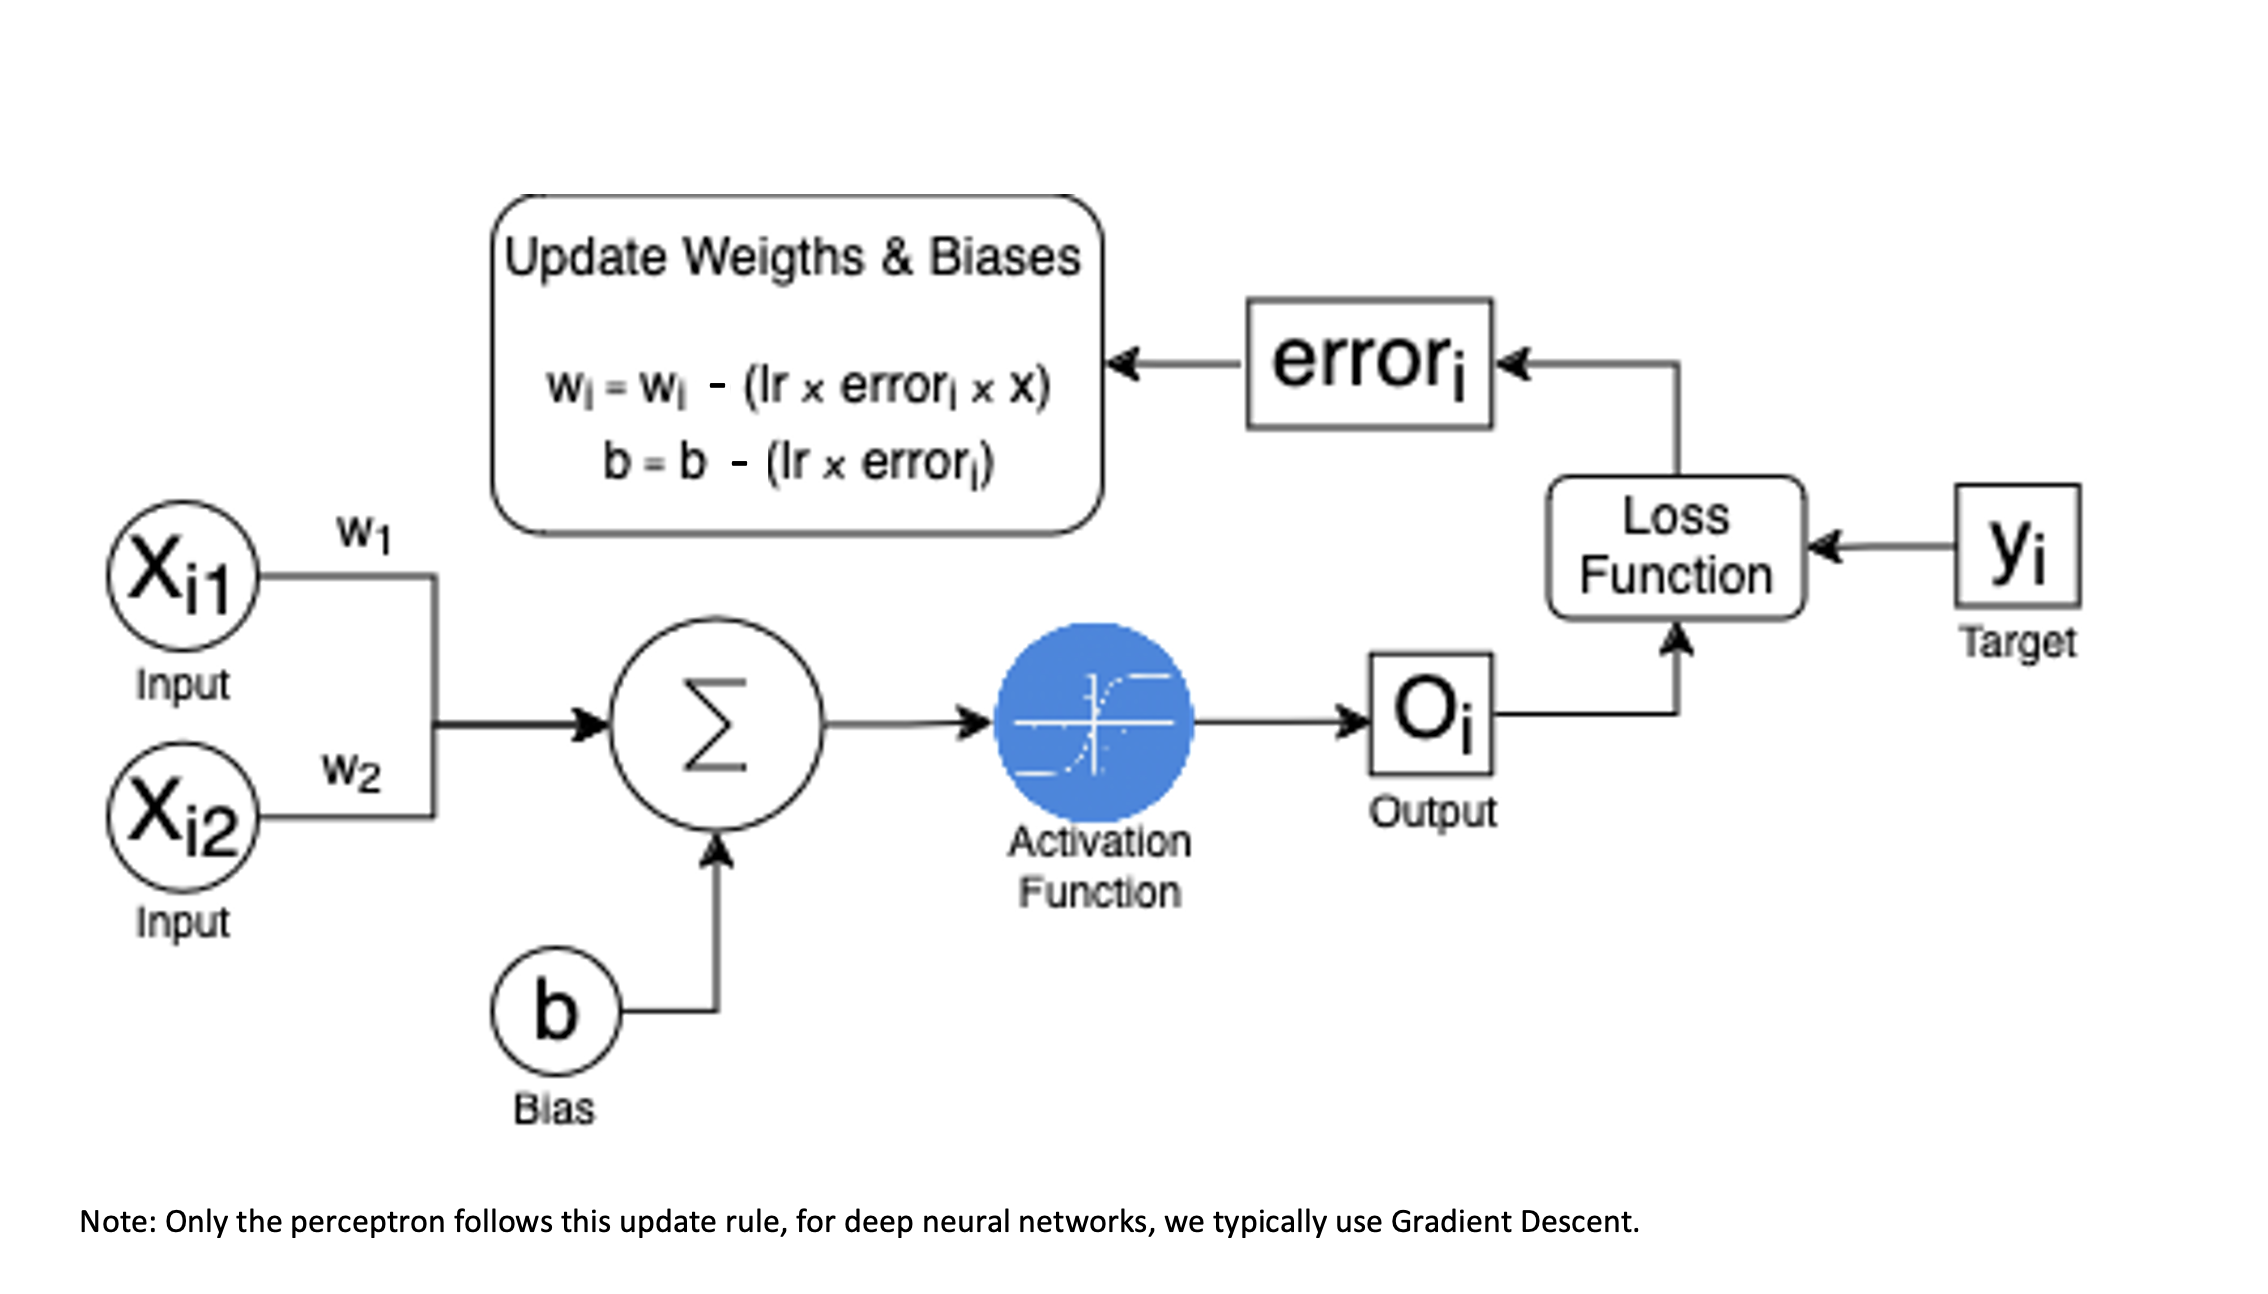

In [2]:
display(Image(filename=project_path+'images/class4/delta_rule.png', width=1000, height=800))


### **Exercise 1: Implement Stochastic Gradient Descent for Linear Regression**
Given the input dataset `X` and target values `y`:
1. Initialize the model's weights and bias randomly.
2. Implement a training loop using SGD to update weights and bias.
3. Monitor the Mean Squared Error (MSE) over epochs.
4. Output the final learned weights and bias.

1. **Initialize Parameters:**

**2. Training Loop:**

3. **Calculate and Store Loss:**

4. **Output Final Model Parameters:**

5. **Plot Loss Over Epochs:**

### Exercise 2: Implementing a Base Perceptron Class

Create a class called `Perceptron` base class to implement a linear regression model using gradient descent.

1. **Attributes:**
   - `learning_rate`: Controls the step size during parameter updates.
   - `epochs`: The number of iterations through the dataset.
   - `weights` & `bias`: Model parameters to be learned.
   - `loss_values`: List to store loss values during training.

2. **Methods:**
   - `initialize_parameters(input_size)`: Initializes weights and bias based on the size of the input features.

In [11]:
# Base class for Perceptron
class Perceptron:
    def __init__(self, learning_rate=1e-5, epochs=100):


    def initialize_parameters(self, input_size):
        # Initialize weights for each input feature and a single bias value


### Exercise 3: Implementing a Regressor Perceptron Class a subclass of Perceptron

Create a class called `RegressorPerceptron` base class to implement a linear regression model using gradient descent.

1. **Methods:**
   - `predict(X)`: Calculates predictions using the current weights and bias.

In [12]:
# Base class for Perceptron
class RegressorPerceptron(Perceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):
        
    
    def predict(self, X):
        # Predict output for the given input data
       

### Exercise 4: Implementing the `RegressorPerceptronSGD` class a subclass of `RegressorPerceptron`

1. **New Attributes:**
   - `shuffle`: A boolean indicating whether to shuffle the data before each epoch.

2. **New Methods:**
   - `train(X, y)`: Implements the SGD training loop with shuffling.
   - `plot_loss()`: Plots the loss over epochs.
   - `plot_epoch_info_loss()`: Plots the loss distribution for each sample within each epoch.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot (y_i - \hat{y}_i)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.

### **Tasks:**
1. **Complete the `train` method by implementing the following functionalities:**
   - Shuffle the dataset at the beginning of each epoch if `self.shuffle` is set to `True`.
   - Update weights and bias using the Delta Rule.
   - Track and store the MSE loss at the end of each epoch.
   - Track and store the MSE loss for each sample and at end of an epoch calculate the mean and standard deviation.


2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.
   - Define `plot_epoch_info_loss()` to plot the mean and standard deviation of the loss for each sample within each epoch.


In [13]:
# Subclass for Stochastic Gradient Descent
class RegressorPerceptronSGD(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100, shuffle=True):

    def train(self, X, y):
        
    def plot_loss(self):

    def plot_epoch_info_loss(self):


In [14]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [20]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

# Part 2: Types of Gradient Descent

### For Batch Gradient Descent (BGD) and Mini-Batch Gradient Descent (MBGD) we don't exluce $ \frac{2}{n} $

### Gradient Descent Update Rule for Weight $w$

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{MSE}}{\partial w}
$$

Substitute the derivative of MSE with respect to $ w $:

$$
w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
$$


### Gradient Descent Update Rule for Bias $b$

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

In gradient descent, the bias $ b $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
b = b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Substitute the derivative of MSE with respect to $ b $:

$$
b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
$$

## Batch Gradient Descent

### Exercise 5: Implementing the `RegressorPerceptronSGD` class a subclass of `RegressorPerceptron`

Implementing Batch Gradient Descent (BGD) for Linear Regression

1. **New Methods:**
   - `train(X, y)`: Implements the SGD training loop with shuffling.
   - `plot_loss()`: Plots the loss over epochs.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
   - $n$ is the number of data points.

2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.
   - $n$ is the number of data points.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.
   - $ n $ number of samples in dataset.

### **Tasks:**
1. **Complete the `train` method by implementing the following functionalities:**
   - Update weights and bias using the Delta Rule.
   - Track and store the MSE loss at the end of each epoch.

2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.

In [26]:
# Subclass for Batch Gradient Descent
class RegressorPerceptronBGD(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):

    def train(self, X, y):
       
    def plot_loss(self):


In [27]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [29]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

## Mini-Batch Gradient Descent

### Exercise 6: Implementing the `RegressorPerceptronMBGD` class a subclass of `RegressorPerceptron`

Implementing Mini-Batch Gradient Descent (MBGD) for Linear Regression

1. **New Attributes:**
   - `batch_size`: The number of samples in each mini-batch. Default is 16.
   - `shuffle`: A boolean indicating whether to shuffle the data at the start of each epoch. Default is `True`.

2. **New Methods:**
   - `train(X, y)`: Implements the mini-batch gradient descent training loop.
   - `plot_loss()`: Plots the loss over epochs.
   - `plot_epoch_info_loss()`: Plots the loss distribution for each batch within each epoch.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
   - $n$ is the number of data points.

2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.
   - $n$ is the number of data points.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.
   - $ n $ number of samples in dataset.


### **Task:**
1. Complete the `train` method by implementing the following functionalities:
   - Shuffle the dataset at the beginning of each epoch if `self.shuffle` is set to `True`.
   - Divide the dataset into mini-batches.
   - Update weights and bias using the gradients computed for each mini-batch.
   - Track and store the MSE loss at the end of each epoch.
   - Track and store the MSE loss for each sample and at end of an epoch calculate the mean and standard deviation.

2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.
   - Define `plot_epoch_info_loss()` to plot the mean and standard deviation of the loss for each sample within each epoch.


In [33]:
# Subclass for Mini-Batch Gradient Descent with an optional Shuffling parameter
class RegressorPerceptronMBGB(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100, batch_size=16, shuffle=True):

    def train(self, X, y):
        
    def plot_loss(self):

    def plot_epoch_info_loss(self):

In [34]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [36]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

# Part 3: Classification Problem with Single Layer Perceptron

Now let's use our class to solve a classification problem.

In [42]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate

## Delta Rule: Derivative of Binary Cross-Entropy (BCE) and Weight Update

### Binary Cross-Entropy (BCE) Loss Function

The **Binary Cross-Entropy (BCE)** loss function is commonly used for binary classification tasks and measures how well the model’s predicted probabilities align with the actual class labels.

The BCE loss is defined as:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Where:
- $ n $ is the number of data points.
- $ y_i $ is the actual class label (0 or 1).
- $ \hat{y}_i $ is the predicted probability, calculated using the **sigmoid activation function**:

$$
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
$$

And:
- $ z_i = w \cdot x_i + b $
- $ w $ is the weight vector.
- $ x_i $ is the input feature vector.
- $ b $ is the bias term.

### Derivative of BCE with Respect to Weight $ w $

Let's find the derivative of the Binary Cross-Entropy loss function with respect to the weight $ w $.

1. **Substitute** $ \hat{y}_i $ in the BCE formula:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log\left(\frac{1}{1 + e^{-z_i}}\right) + (1 - y_i) \cdot \log\left(1 - \frac{1}{1 + e^{-z_i}}\right) \right]
$$

2. **Simplify** the expression for $ \hat{y}_i $:

$$
\hat{y}_i = \frac{1}{1 + e^{-z_i}}
$$

The derivative of the BCE loss function with respect to $ \hat{y}_i $ is:

$$
\frac{\partial \text{BCE}}{\partial \hat{y}_i} = -\frac{y_i}{\hat{y}_i} + \frac{1 - y_i}{1 - \hat{y}_i}
$$

3. **Chain rule**: Now, we need the derivative of $ \hat{y}_i $ with respect to the weight $ w $.

Using the derivative of the sigmoid function:

$$
\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i \cdot (1 - \hat{y}_i)
$$

And since $ z_i = w \cdot x_i + b $, we have:

$$
\frac{\partial z_i}{\partial w} = x_i
$$

4. **Combining** the derivatives:

The derivative of BCE with respect to the weight $ w $ is:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} \frac{\partial \text{BCE}}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial z_i} \cdot \frac{\partial z_i}{\partial w}
$$

Substitute the individual derivatives:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} \left( -\frac{y_i}{\hat{y}_i} + \frac{1 - y_i}{1 - \hat{y}_i} \right) \cdot \hat{y}_i \cdot (1 - \hat{y}_i) \cdot x_i
$$

Simplifying:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} ( \hat{y}_i - y_i ) \cdot x_i
$$

### Gradient Descent Update Rule

In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{BCE}}{\partial w}
$$

Substitute the derivative of BCE with respect to \( w \):

$$
w = w - \eta \cdot \sum_{i=1}^{n} ( \hat{y}_i - y_i ) \cdot x_i
$$

For the **Delta Rule**, we typically consider updating weights for **each individual training example** rather than averaging over the entire dataset. This means the weight update becomes:

$$
w = w - \eta \cdot ( \hat{y}_i - y_i ) \cdot x_i
$$

### Final Weight Update Rule

The weight update rule for each individual training example becomes:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

This is the Delta Rule used in the binary classification example, where:

- $ y_i - \hat{y}_i $ is the error.
- $ \eta $ is the learning rate.
- $ x_i $ is the input feature.

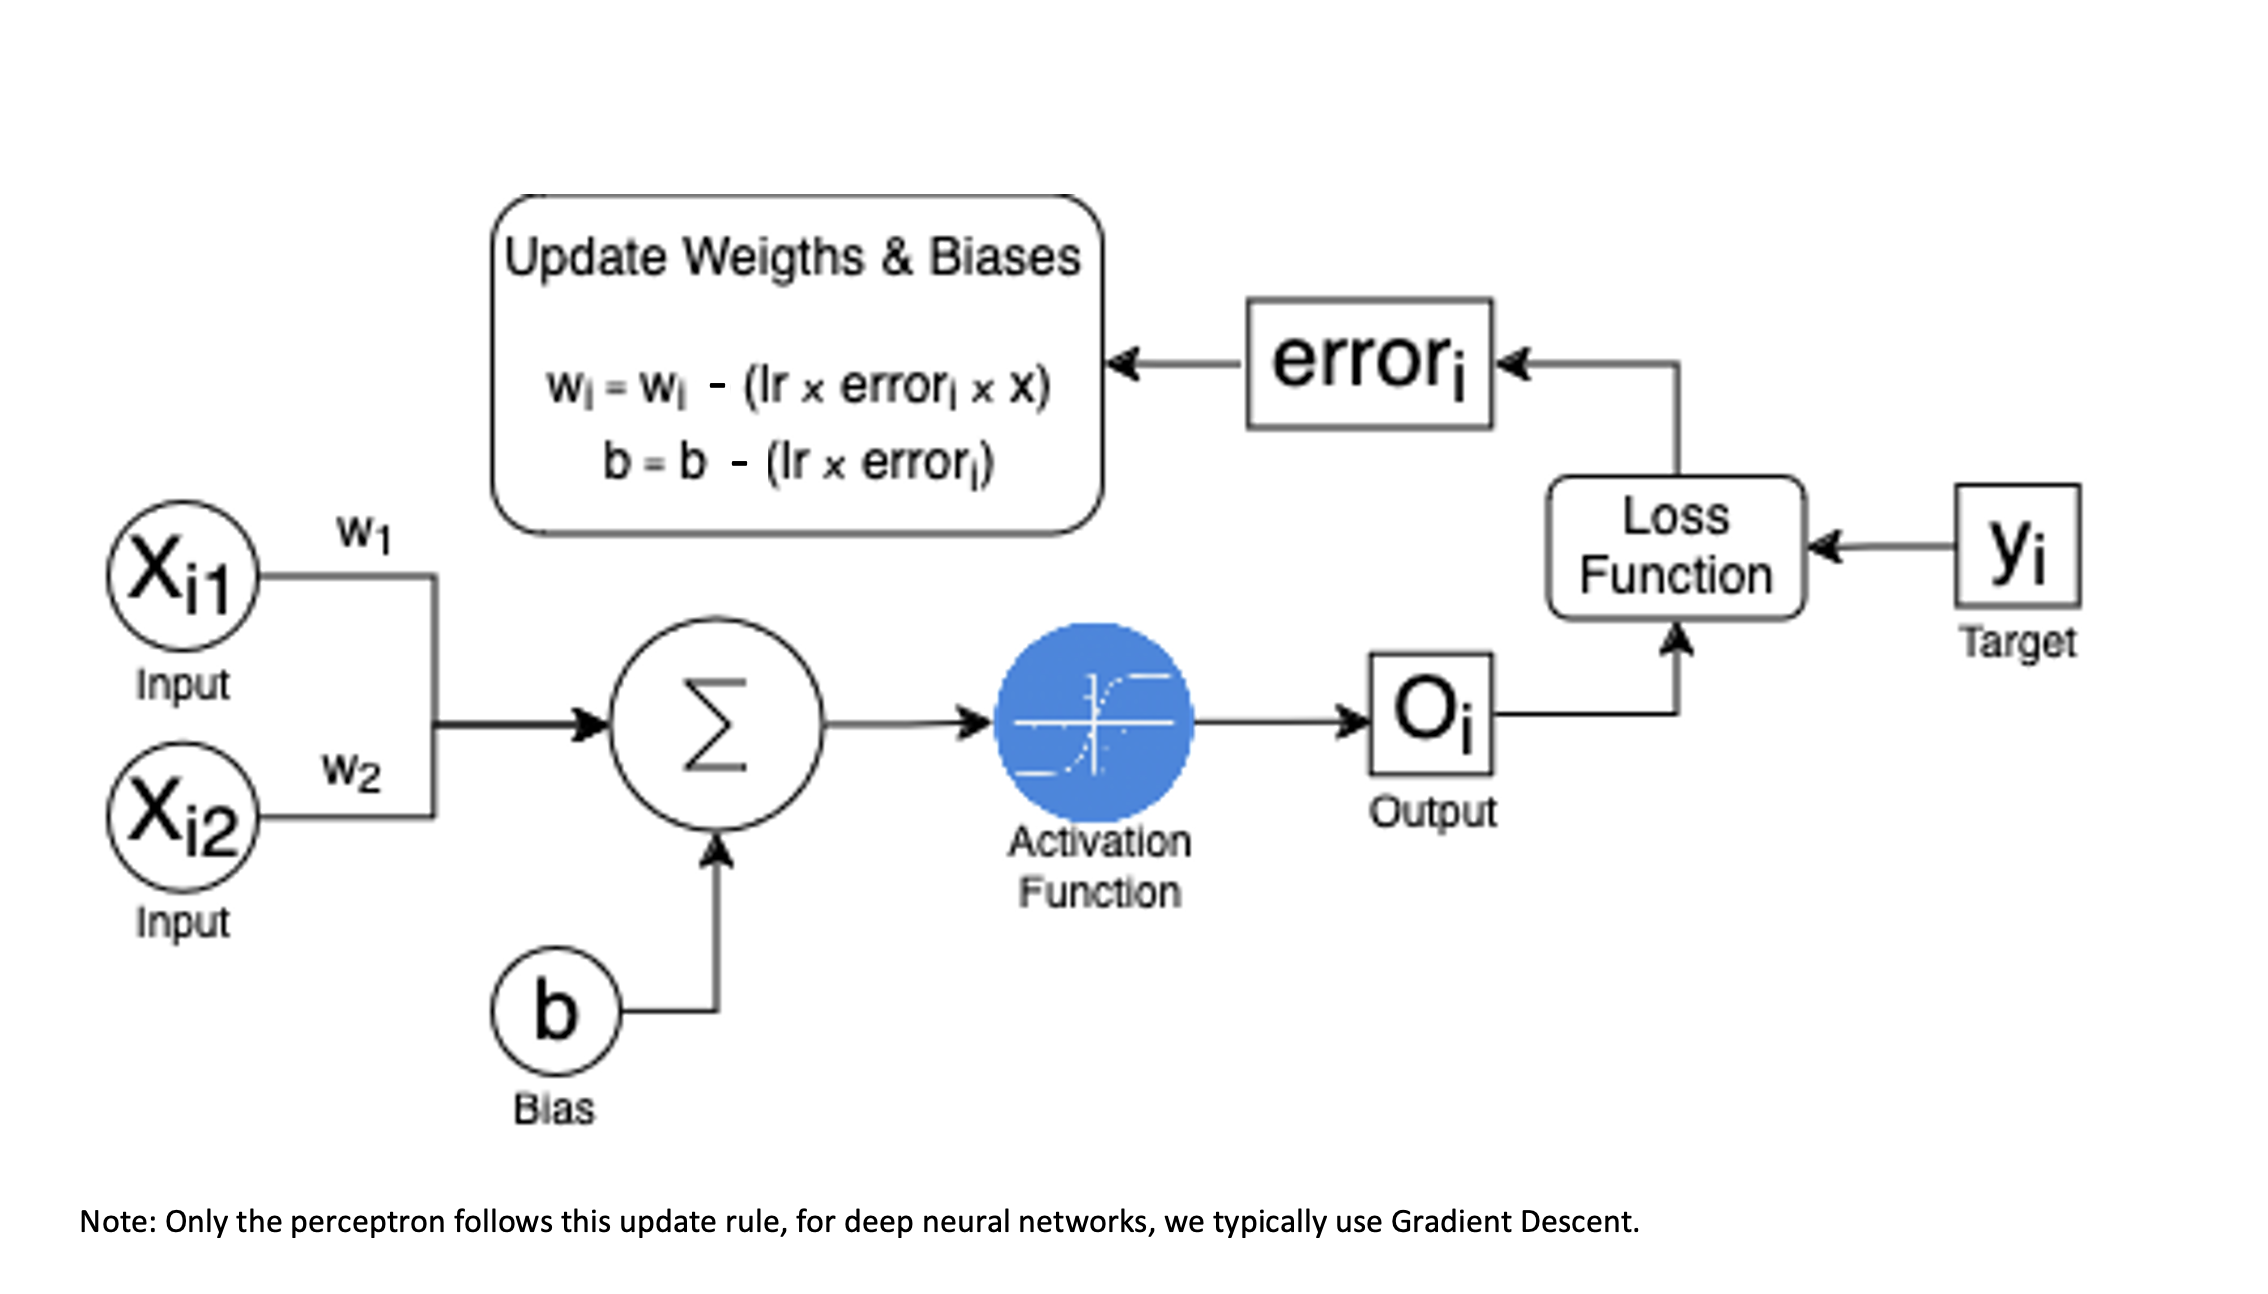

In [3]:
display(Image(filename=project_path+'images/class4/delta_rule.png', width=1000, height=800))

### Exercise 7: Implementing a Binary Classifier Perceptron Class a subclass of Perceptron

Create a class called `BinaryClassifierPerceptron` base class to implement a binary classification model.

1. **Methods:**
   - `predict_proba(X)`: Predicts the probabilities using the current weights and bias (convert logits into probabilities).
   - `predict(X)`: Converts the probabilities to binary labels that are the final prediction (if bigger than 0.5 is 1, 0 otherwise.)

In [47]:
class BinaryClassifierPerceptron(Perceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):

    def predict_proba(self, X):


    def predict(self, X):


### Exercise 8: Implementing `BinaryClassifierPerceptronSGD` a subclass of `BinaryClassifierPerceptron`

Implement the `BinaryClassifierPerceptronSGD` class to perform binary classification using Stochastic Gradient Descent (SGD). Learn how to apply sigmoid activation and compute the binary cross-entropy loss for classification tasks.

1. **New Attributes:**
   - `loss_fn`: The loss function used to calculate the error, use `nn.BCELoss()`. (`import torch.nn as nn`)

2. **New Methods:**
   - `activation_function(z)`: Implements the sigmoid activation function.1.
   - `binary_cross_entropy(y_true, y_pred):` Uses the BCE Loss to calculate the loss.
   - `plot_loss()`: Plots the loss over epochs.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot (y_i - \hat{y}_i)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.

3. **Loss Function:**
   The Binary Cross-Entropy Loss measures the error for binary classification tasks:

   $$
   \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
   $$

   Where:
   - $ n $ is the number of data points.
   - $ y_i $ is the actual class label (0 or 1).
   - $ \hat{y}_i $ is the predicted probability, calculated using the **sigmoid activation function**:

4. **Sigmoid Activation Function:**
   $$
   \hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
   $$

   And:
   - $ z_i = w \cdot x_i + b $
   - $ w $ is the weight vector.
   - $ x_i $ is the input feature vector.
   - $ b $ is the bias term.

#### **Task:**
1. **Implement the `activation_function`**

2. **Implement the `binary_cross_entropy`**

3. **Complete the `train` method by implementing the following functionalities:**
   - Apply the sigmoid function to convert linear outputs into probabilities.
   - Use Binary Cross-Entropy Loss to measure error.
   - Update weights and bias using gradient descent.
   - Track and store the BCE loss at the end of each epoch.

4. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.

In [72]:
import torch.nn as nn 
import torch

class BinaryClassifierPerceptronSGD(BinaryClassifierPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):


    def activation_function(self, z):

    def binary_cross_entropy(self, y_true, y_pred):

    def train(self, X, y):

    def plot_loss(self):


In [73]:
np.random.seed(0)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate

In [77]:
np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR gate

That is as far as our single-layer perceptron can go :(

The XOR problem requires a decision boundary that is not linear. A single-layer perceptron can only create a linear decision boundary (i.e., a straight line) and thus cannot correctly classify the XOR pattern.